In [18]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
tm_short_data = yf.download("TM", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tm_short_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Datetime,,,,,
2024-12-30 14:30:00+00:00,197.800003,198.000000,197.399994,198.000000,17075
2024-12-30 14:32:00+00:00,197.250000,197.949997,197.250000,197.949997,5514
2024-12-30 14:34:00+00:00,197.169998,197.179993,196.809998,197.110001,6389
2024-12-30 14:36:00+00:00,197.199997,197.315002,196.868195,197.240005,5497
2024-12-30 14:38:00+00:00,197.630005,197.630005,197.009995,197.009995,2106


In [ ]:
# rename the columns
new_column_names = ["Close", "High", "Low", "Open", "Volume"]
tm_short_data.columns = new_column_names

In [ ]:
tm_short_data.tail()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-28 20:50:00+00:00,185.360001,185.369995,184.830002,184.990005,6399
2025-01-28 20:52:00+00:00,185.309998,185.369995,185.250000,185.360001,4086
2025-01-28 20:54:00+00:00,185.339996,185.399994,185.300003,185.300003,6993
2025-01-28 20:56:00+00:00,185.229996,185.309998,185.110001,185.309998,7532
2025-01-28 20:58:00+00:00,185.350006,185.350006,185.179993,185.225006,10311


In [ ]:
tm_short_data.shape

(3300, 5)

In [ ]:
tm_short_data.describe()

,Close,High,Low,Open,Volume
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,188.345276,188.395141,188.295822,188.346864,2283.421212
std,4.794287,4.803008,4.787286,4.795574,3826.214001
min,179.717300,179.979996,179.717300,179.770004,100.000000
25%,184.949997,184.990005,184.910004,184.949997,771.000000
50%,186.589996,186.630005,186.558998,186.592499,1400.000000
75%,193.419998,193.479996,193.360001,193.419998,2504.250000
max,197.800003,198.000000,197.399994,198.000000,96905.000000


In [ ]:
tm_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3300 entries, 2024-12-30 14:30:00+00:00 to 2025-01-28 20:58:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3300 non-null   float64
 1   High    3300 non-null   float64
 2   Low     3300 non-null   float64
 3   Open    3300 non-null   float64
 4   Volume  3300 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.7 KB


In [ ]:
# check for the missing values
tm_short_data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# download the data
tm_short_data.to_csv("tm_short_data.csv")

# Loading the data

In [20]:
tm_short_data = pd.read_csv("tm_short_data.csv")

# Exploratory Analysis

In [21]:
tm_short_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2024-12-30 14:30:00+00:00,197.800003,198.000000,197.399994,198.000000,17075
1,2024-12-30 14:32:00+00:00,197.250000,197.949997,197.250000,197.949997,5514
2,2024-12-30 14:34:00+00:00,197.169998,197.179993,196.809998,197.110001,6389
3,2024-12-30 14:36:00+00:00,197.199997,197.315002,196.868195,197.240005,5497
4,2024-12-30 14:38:00+00:00,197.630005,197.630005,197.009995,197.009995,2106


In [22]:
tm_short_data.shape

(3300, 6)

## Univariate Analysis

In [23]:
tm_short_data.describe()

,Close,High,Low,Open,Volume
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,188.345276,188.395141,188.295822,188.346864,2283.421212
std,4.794287,4.803008,4.787286,4.795574,3826.214001
min,179.717300,179.979996,179.717300,179.770004,100.000000
25%,184.949997,184.990005,184.910004,184.949997,771.000000
50%,186.589996,186.630005,186.558998,186.592499,1400.000000
75%,193.419998,193.479996,193.360001,193.419998,2504.250000
max,197.800003,198.000000,197.399994,198.000000,96905.000000


In [24]:
tm_short_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3300 non-null   object 
 1   Close     3300 non-null   float64
 2   High      3300 non-null   float64
 3   Low       3300 non-null   float64
 4   Open      3300 non-null   float64
 5   Volume    3300 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 154.8+ KB


In [25]:
# change datetime data
tm_short_data['Datetime'] = pd.to_datetime(tm_short_data['Datetime'])

In [26]:
# skewness and kurtosis
print("Skewness:", tm_short_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", tm_short_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     0.262901
High      0.264068
Low       0.261203
Open      0.262511
Volume    9.653634
dtype: float64
Kurtosis: Close      -1.275490
High       -1.277300
Low        -1.273038
Open       -1.274032
Volume    158.725858
dtype: float64


## Distribution Analysis

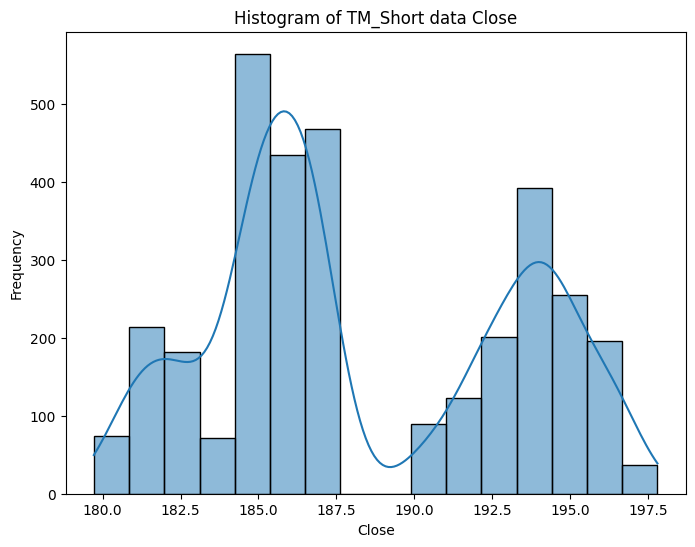

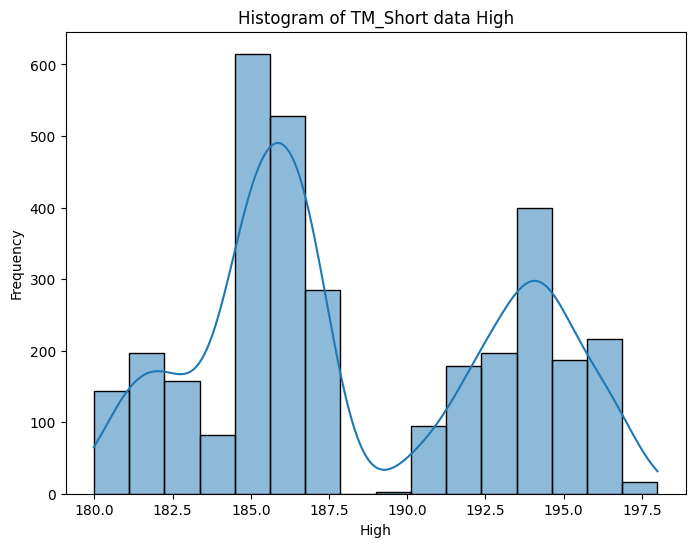

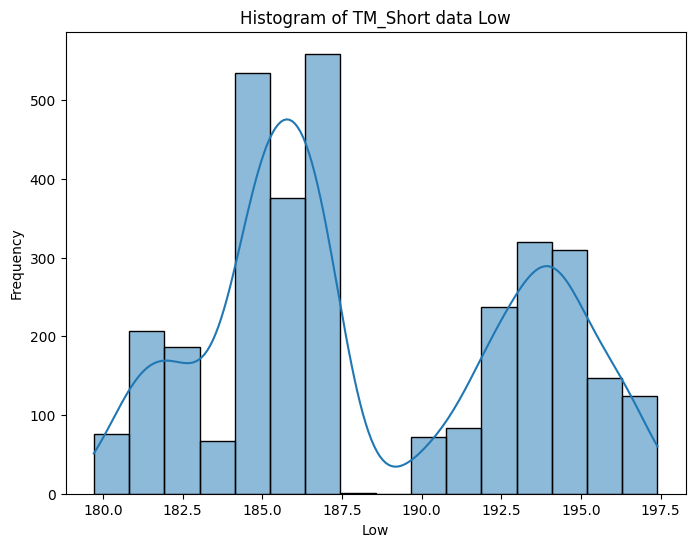

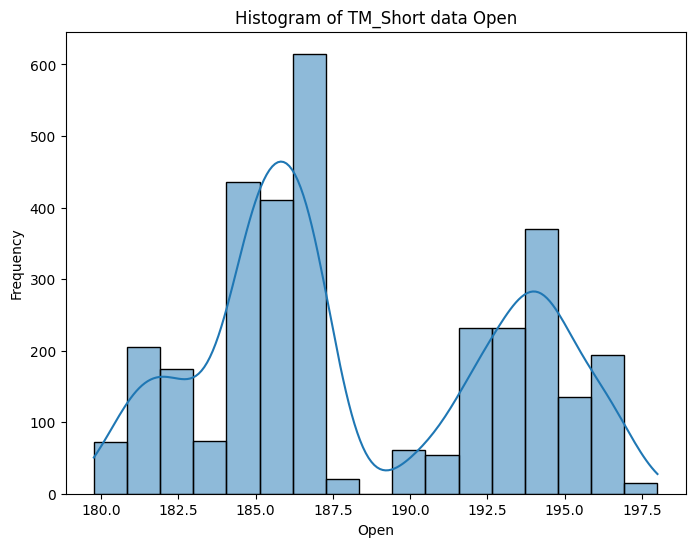

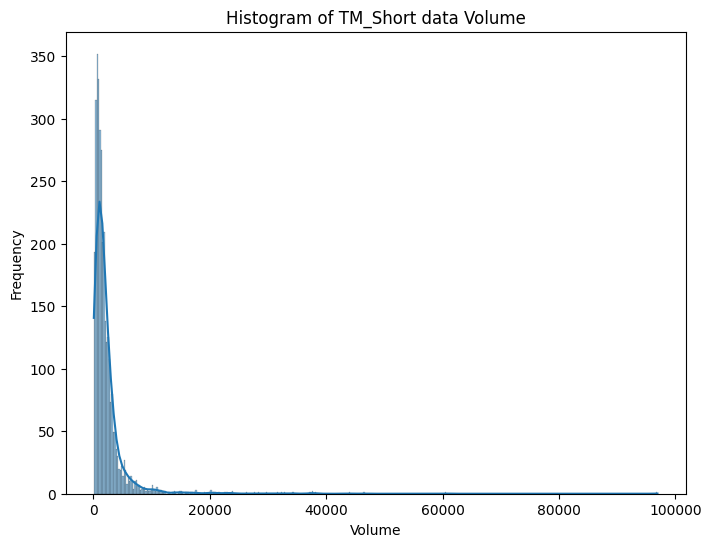

In [27]:
# Identify numerical columns
numerical_columns = tm_short_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(tm_short_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(tm_short_data[column], kde=True)
        plt.title(f'Histogram of TM_Short data {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

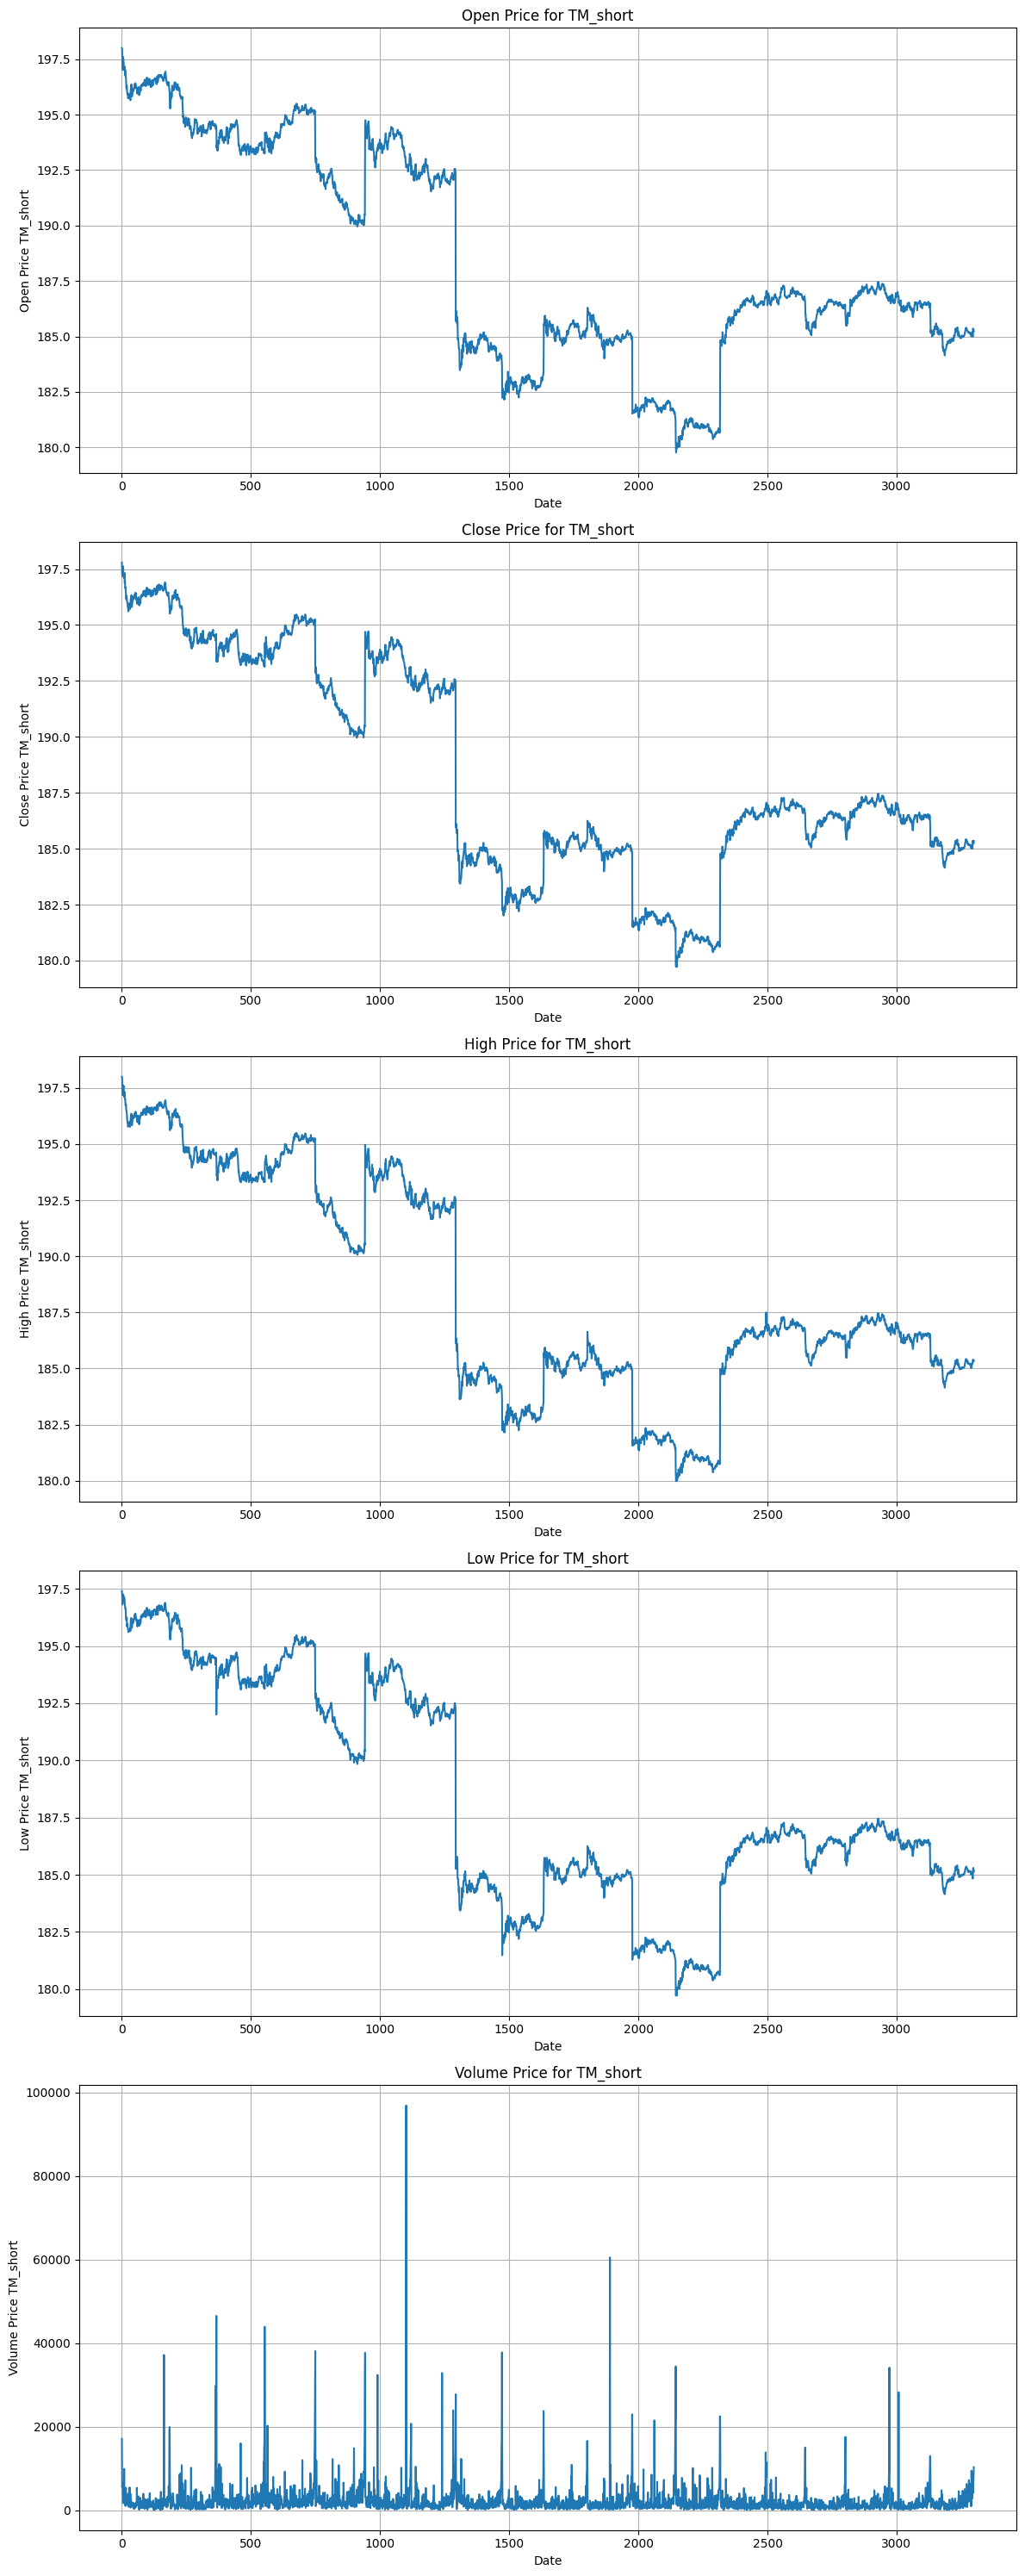

In [28]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(tm_short_data.index, tm_short_data[col])
    axes[i].set_title(f'{col} Price for TM_short')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price TM_short')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

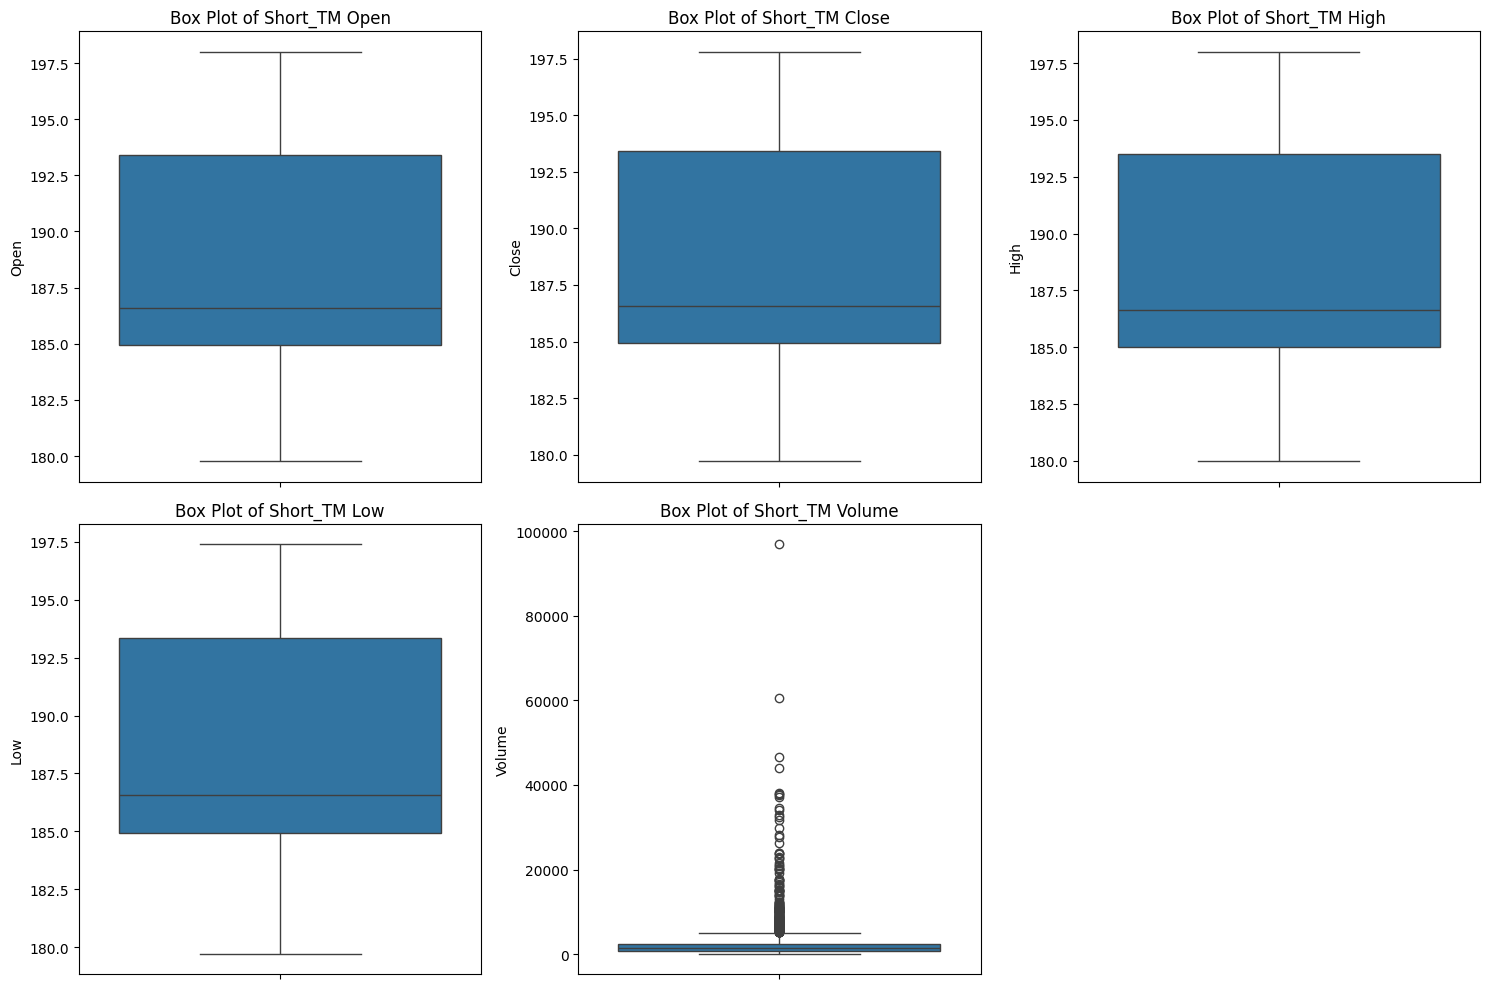

In [29]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=tm_short_data[col])
    plt.title(f'Box Plot of Short_TM {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

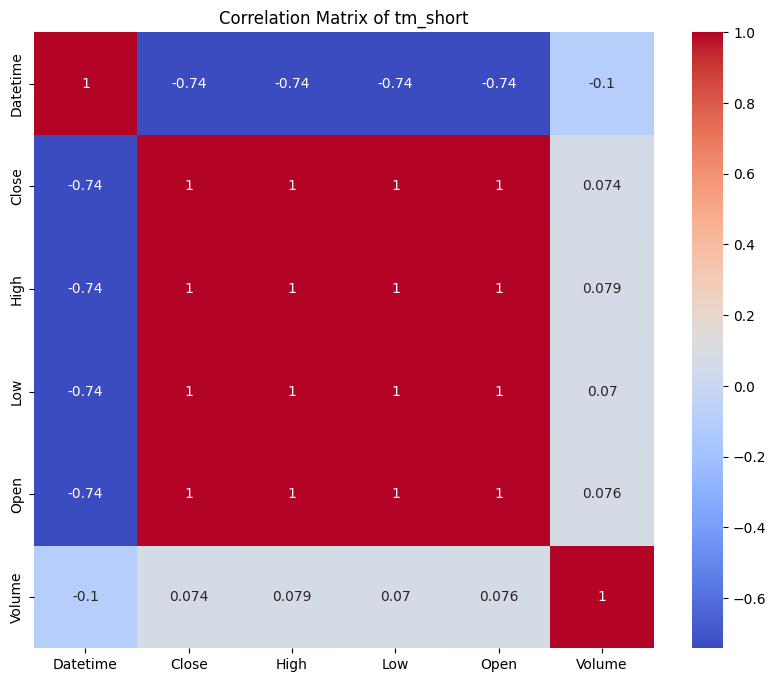

In [32]:
correlation_matrix = tm_short_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of tm_short')
plt.show()

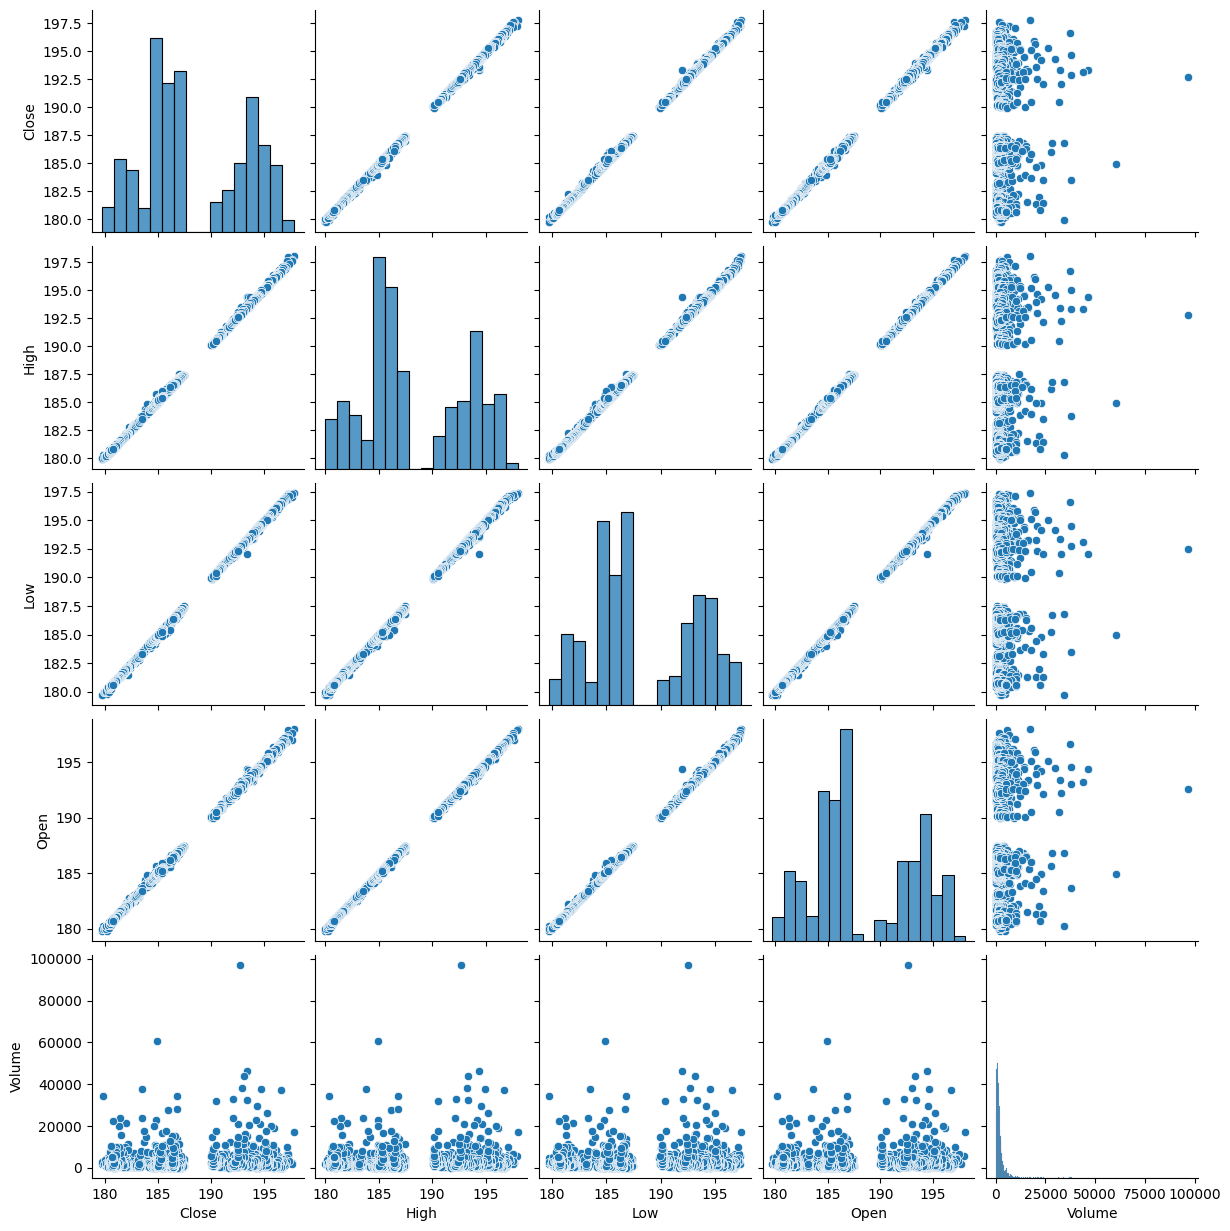

In [31]:
# pairs of numerical columns
sns.pairplot(tm_short_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'Relationship between Close Price and Trading Volume of Short_TM')

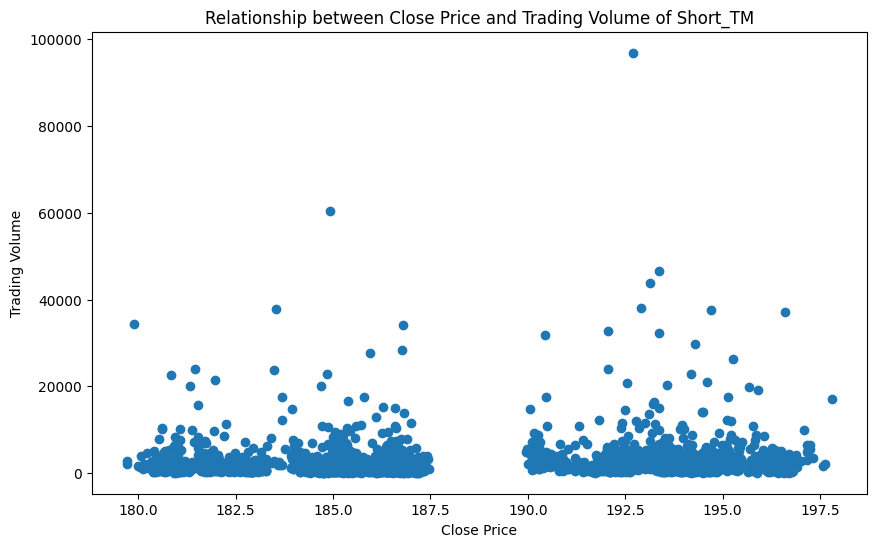

In [33]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(tm_short_data['Close'], tm_short_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('Relationship between Close Price and Trading Volume of Short_TM')

# Feature Engineering

In [35]:
# Moving Average (SMA) with a 5-day window
window_sma = 5
tm_short_data['SMA'] = tm_short_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 5-day window
tm_short_data['StdDev'] = tm_short_data['Close'].rolling(window=window_sma).std()
tm_short_data['UpperBand'] = tm_short_data['SMA'] + (2 * tm_short_data['StdDev'])
tm_short_data['LowerBand'] = tm_short_data['SMA'] - (2 * tm_short_data['StdDev'])

# RSI with a 7-day window
def calculate_rsi(data, window=7):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tm_short_data['RSI'] = calculate_rsi(tm_short_data)

In [36]:
# Calculate moving averages
tm_short_data['MA_5'] = tm_short_data['Close'].rolling(window=5).mean()
tm_short_data['MA_10'] = tm_short_data['Close'].rolling(window=10).mean()

In [37]:
tm_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,4
StdDev,4
UpperBand,4
LowerBand,4


In [38]:
# fill na with mean
tm_short_data.fillna(tm_short_data.mean(), inplace=True)

In [39]:
tm_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


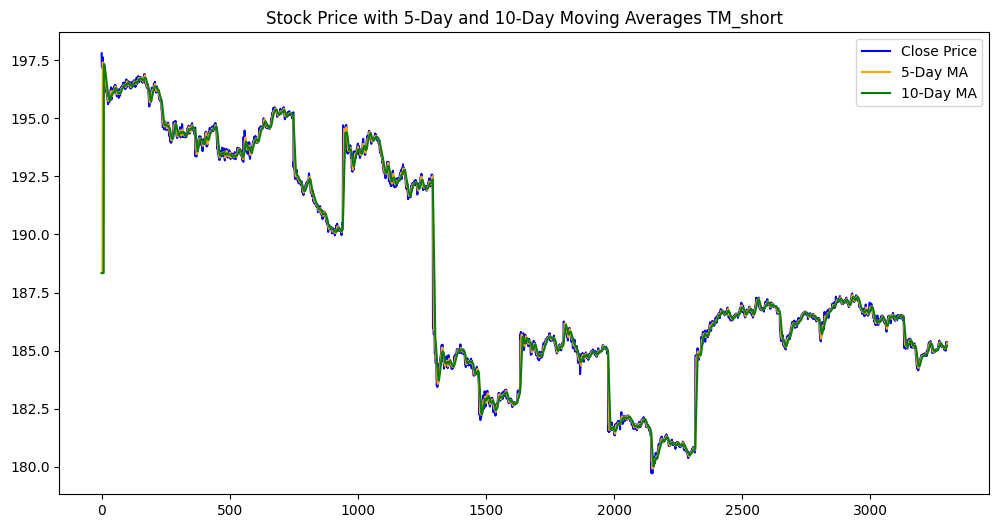

In [41]:
# plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data['Close'], label='Close Price', color='blue')
plt.plot(tm_short_data['MA_5'], label='5-Day MA', color='orange')
plt.plot(tm_short_data['MA_10'], label='10-Day MA', color='green')
plt.title('Stock Price with 5-Day and 10-Day Moving Averages TM_short')
plt.legend()
plt.show()

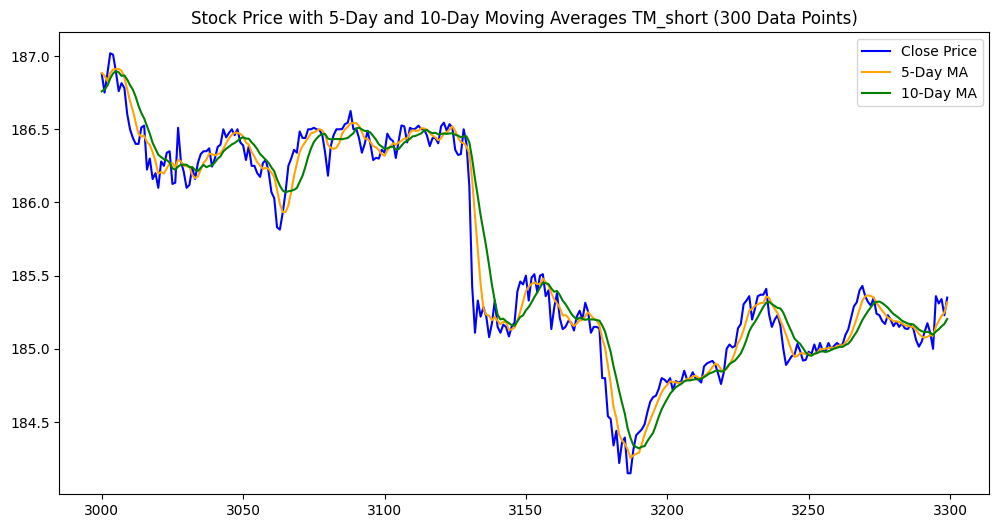

In [43]:
# plot the moving averages for 300 data points
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data['Close'][-300:], label='Close Price', color='blue')
plt.plot(tm_short_data['MA_5'][-300:], label='5-Day MA', color='orange')
plt.plot(tm_short_data['MA_10'][-300:], label='10-Day MA', color='green')
plt.title('Stock Price with 5-Day and 10-Day Moving Averages TM_short (300 Data Points)')
plt.legend()
plt.show()

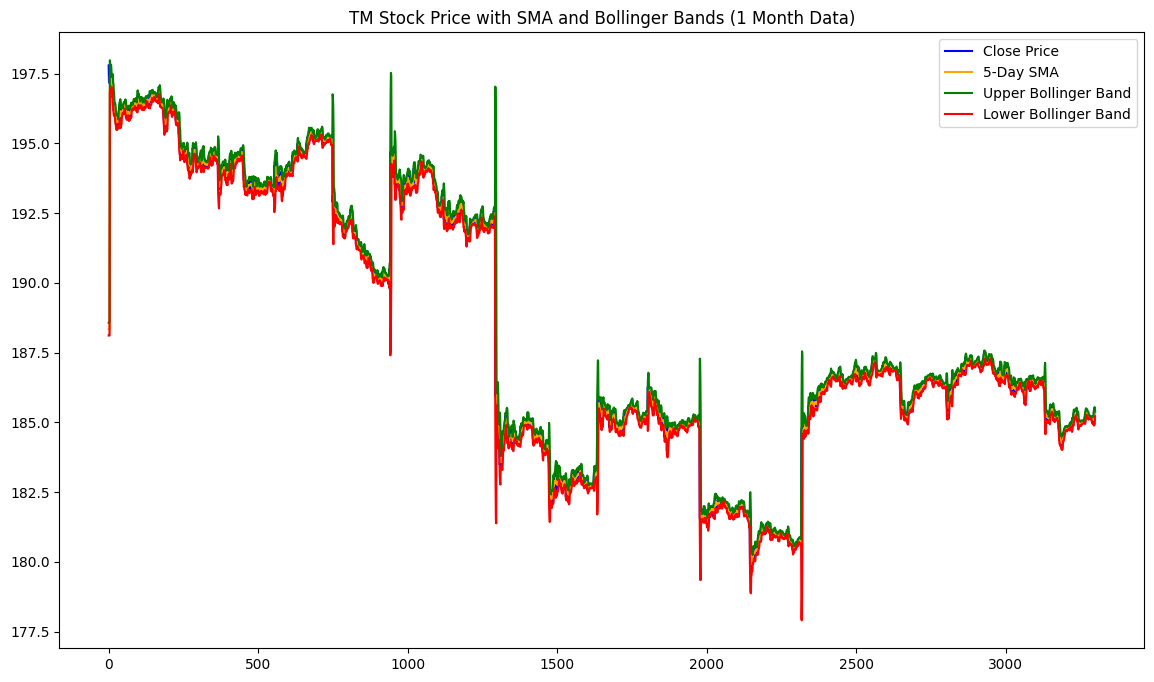

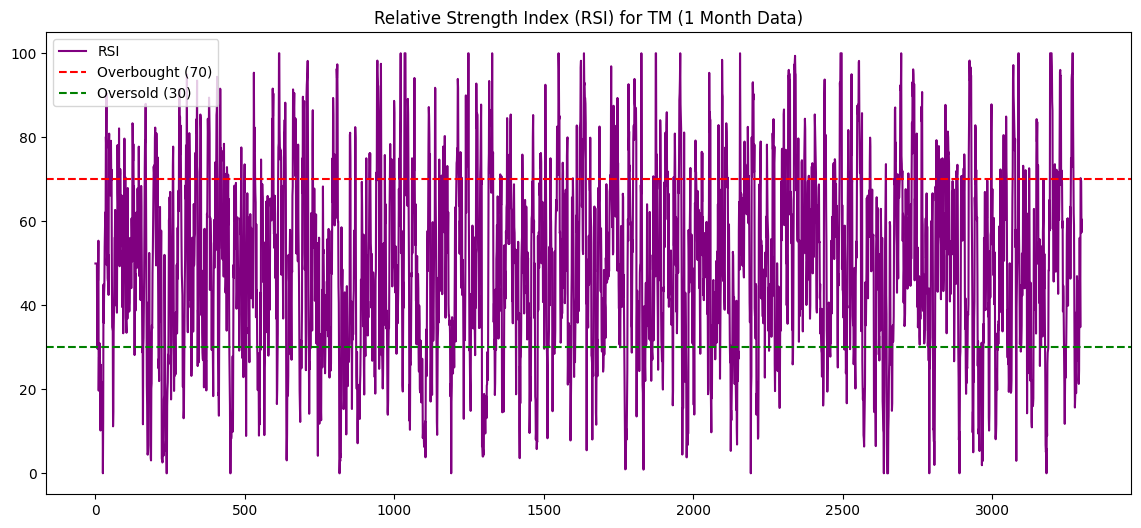

In [44]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(tm_short_data['Close'], label='Close Price', color='blue')
plt.plot(tm_short_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(tm_short_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(tm_short_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(tm_short_data.index, tm_short_data['UpperBand'], tm_short_data['LowerBand'], color='gray', alpha=0.3)
plt.title('TM Stock Price with SMA and Bollinger Bands (1 Month Data)')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(tm_short_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for TM (1 Month Data)')
plt.legend()
plt.show()

In [45]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


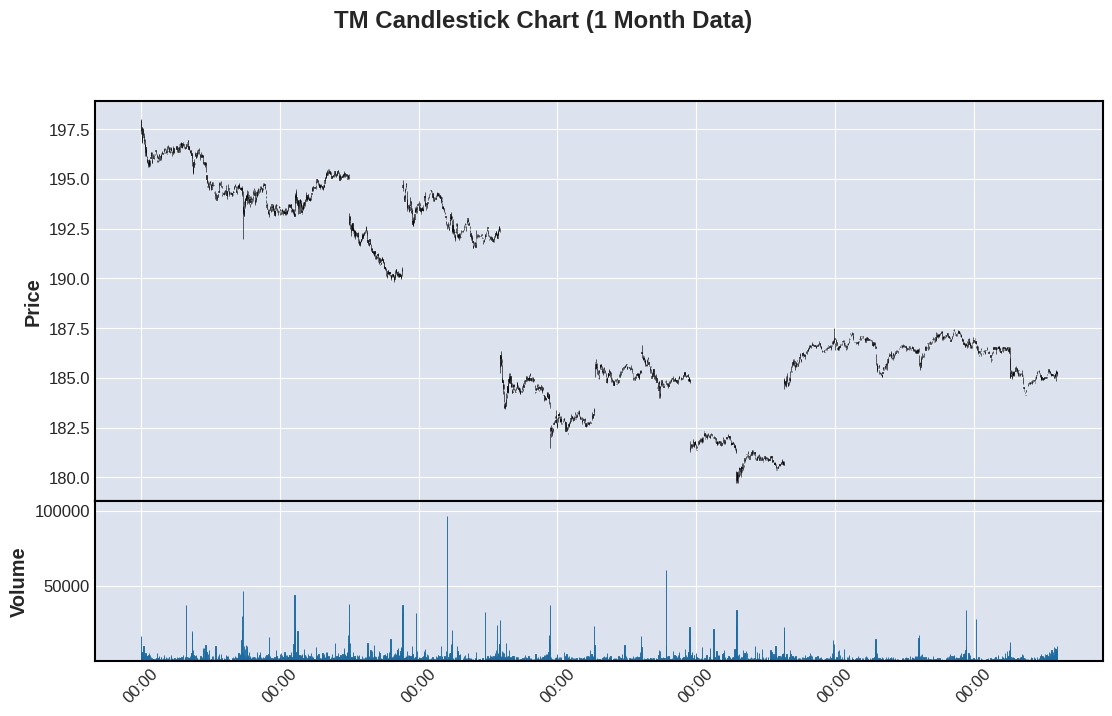

In [46]:
import mplfinance as mpf

# Ensure the index is a datetime object
tm_short_data.index = pd.to_datetime(tm_short_data.index)

# Plot candlestick chart
mpf.plot(tm_short_data, type='candle', volume=True, figsize=(14, 8),
         title='TM Candlestick Chart (1 Month Data)')

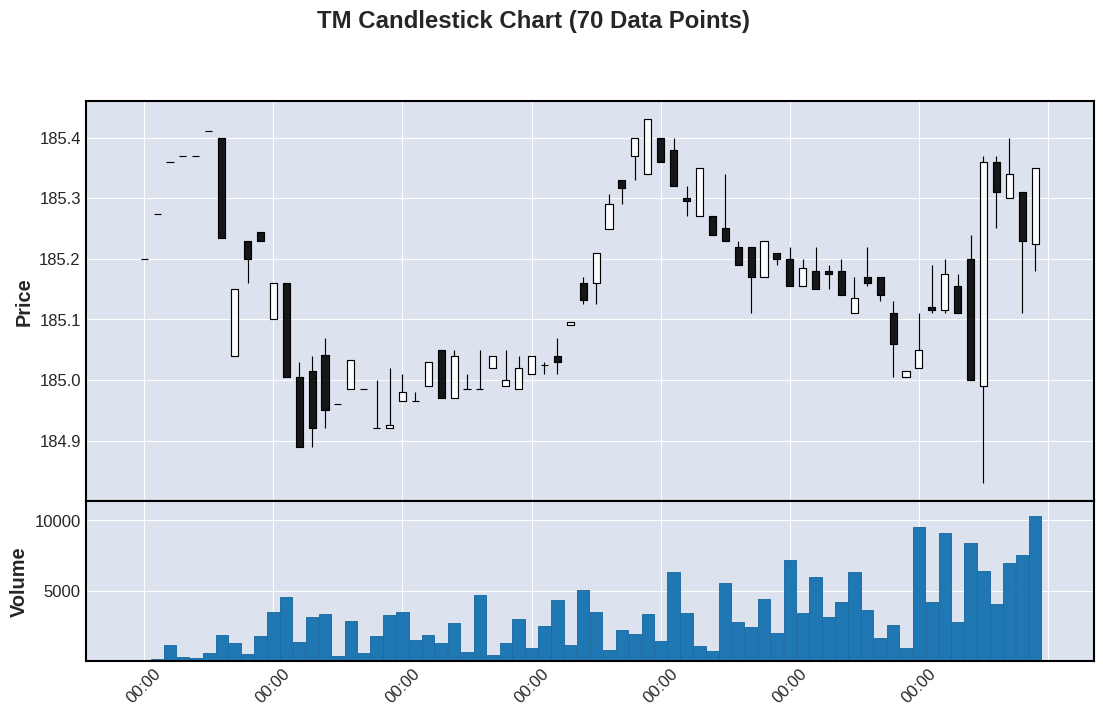

In [47]:
# plot candelstic for Close for 70 data points
mpf.plot(tm_short_data.tail(70), type='candle', volume=True, figsize=(14, 8), title='TM Candlestick Chart (70 Data Points)')

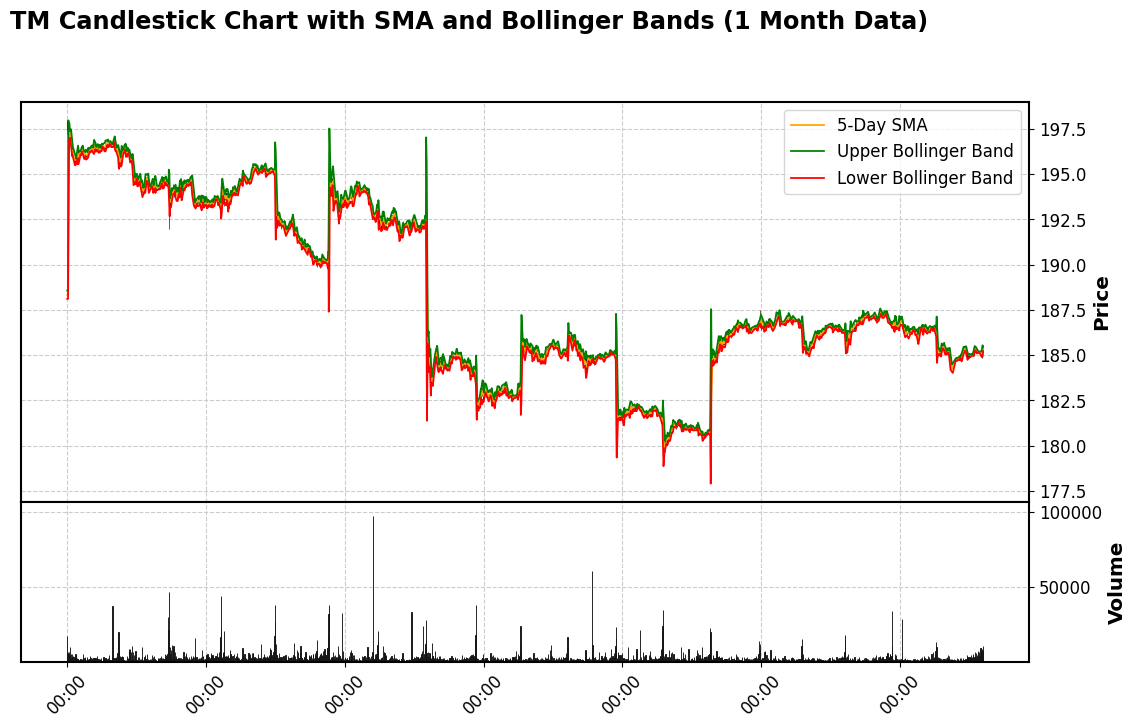

In [48]:
# plots for SMA and Bollinger Bands
ap = [
    mpf.make_addplot(tm_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(tm_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_short_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    tm_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='TM Candlestick Chart with SMA and Bollinger Bands (1 Month Data)',
    style='classic'
)

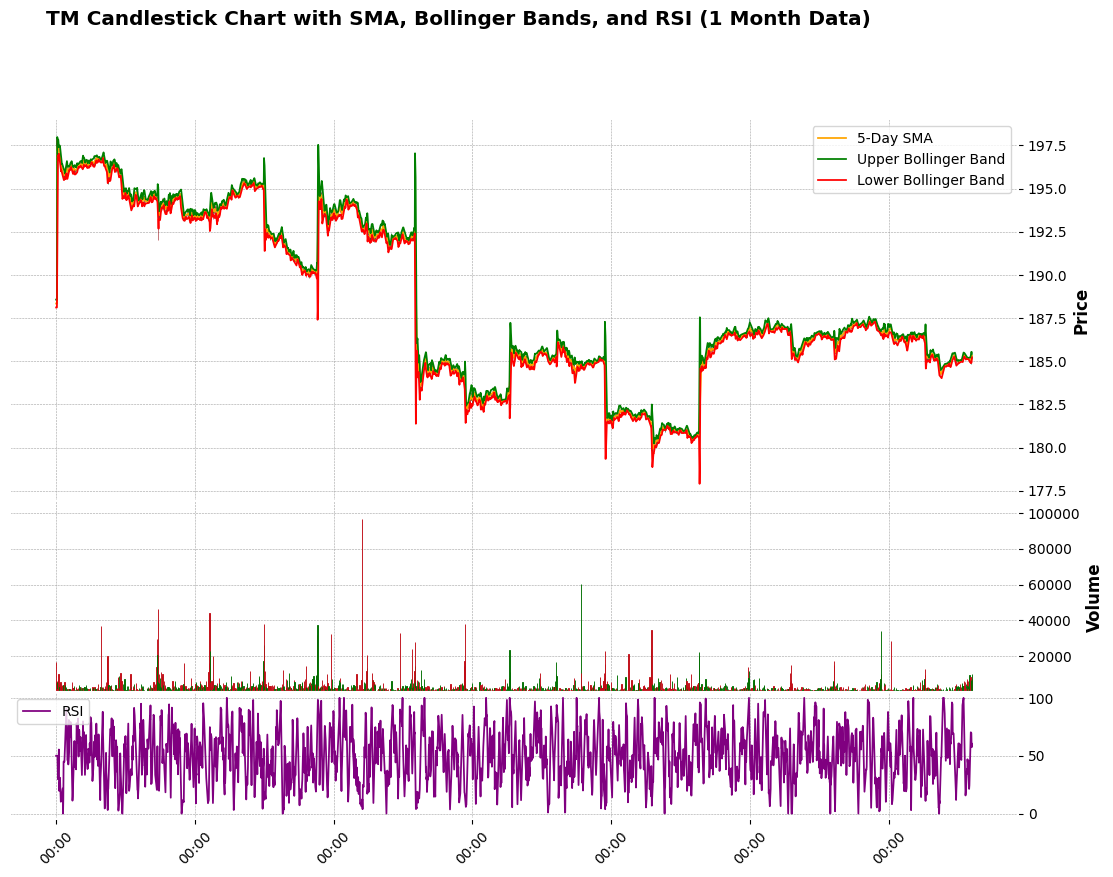

In [49]:
# Create additional plots for SMA, Bollinger Bands, and RSI
ap = [
    mpf.make_addplot(tm_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(tm_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_short_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(tm_short_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    tm_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='TM Candlestick Chart with SMA, Bollinger Bands, and RSI (1 Month Data)',
    style='charles',
    panel_ratios=(6, 3, 2)
)

## Time Series Decomposition

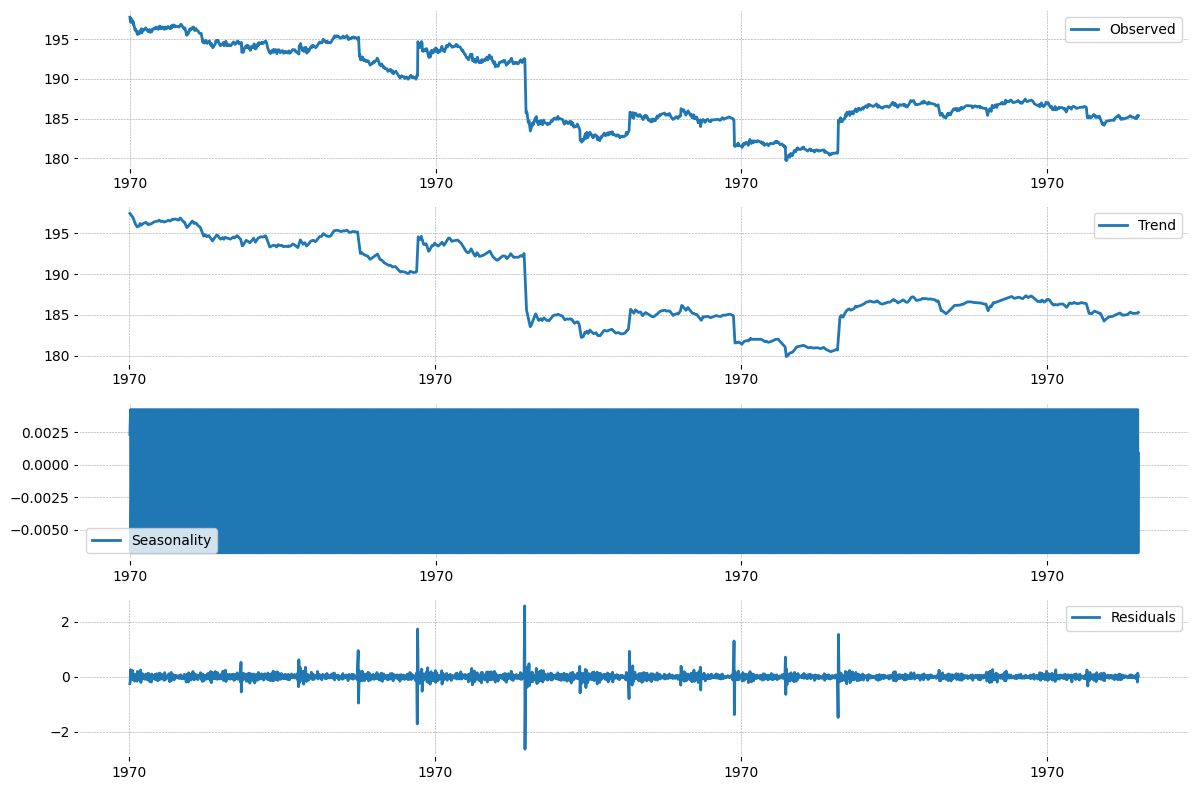

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(tm_short_data['Close'], model='additive', period=5)  # Weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.12%


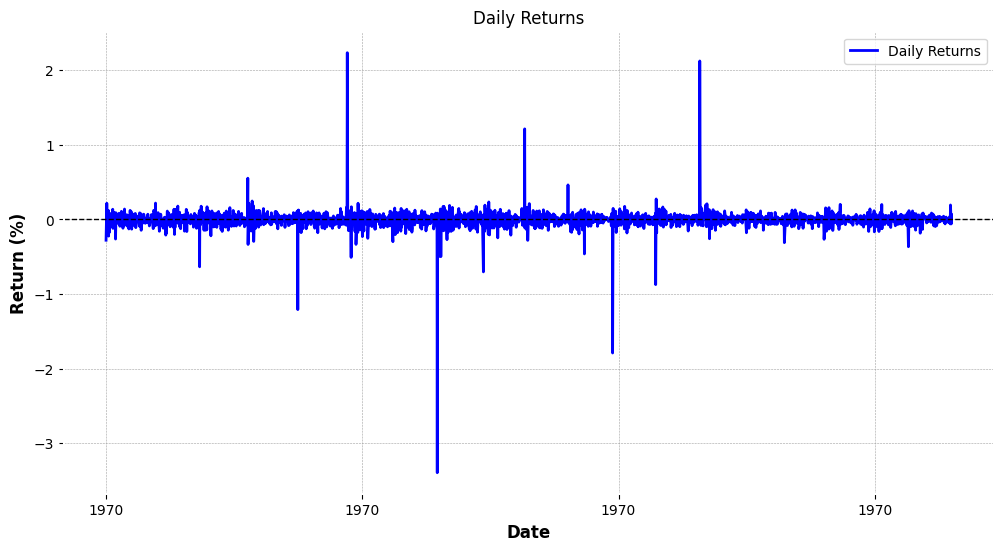

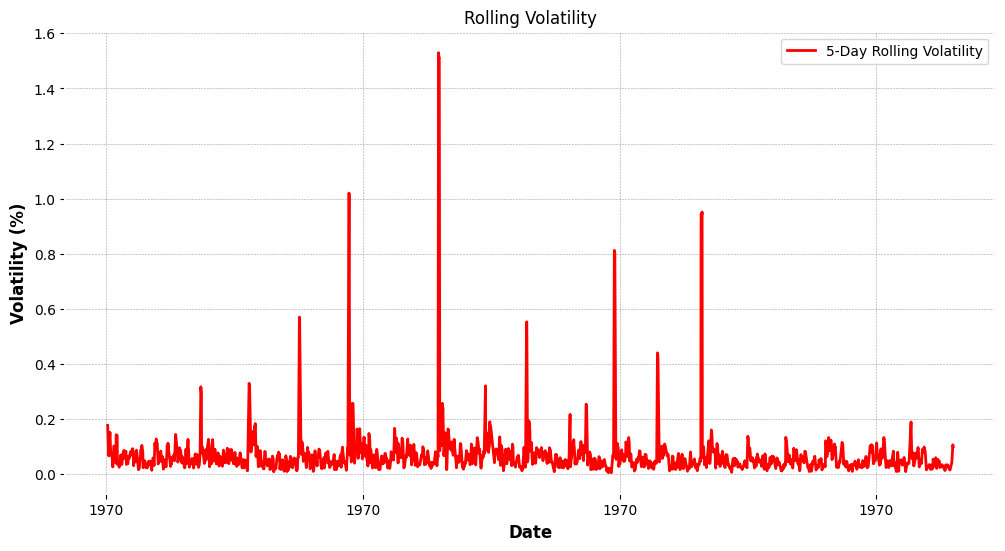

In [51]:
# Calculate daily returns
tm_short_data['Daily_Return'] = tm_short_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = tm_short_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
tm_short_data['Rolling_Volatility'] = tm_short_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()


# Stationarity Test

In [52]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(tm_short_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.8725818233041944
p-value: 0.34506734908301473
Critical Values:
   1%: -3.4323379727696124
   5%: -2.86241836872506
   10%: -2.567237573900571
The data is non-stationary (fail to reject the null hypothesis).


In [53]:
# Apply differencing
tm_short_data['Close_diff'] = tm_short_data['Close'].diff().dropna()

In [54]:
tm_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [55]:
# drop na
tm_short_data.dropna(inplace=True)

In [56]:
# Recheck stationarity using ADF test
result = adfuller(tm_short_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -60.72505645836674
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

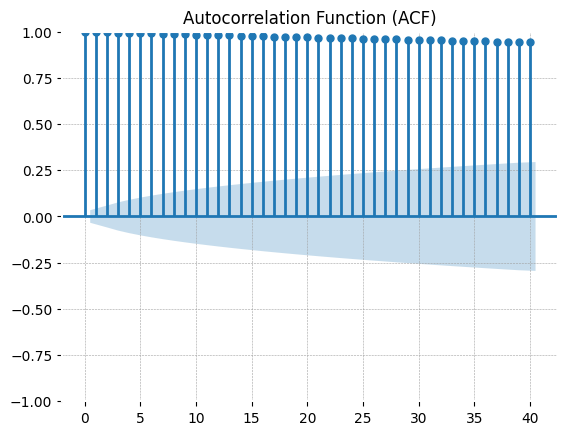

In [57]:
plt.figure(figsize=(10, 5))
plot_acf(tm_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

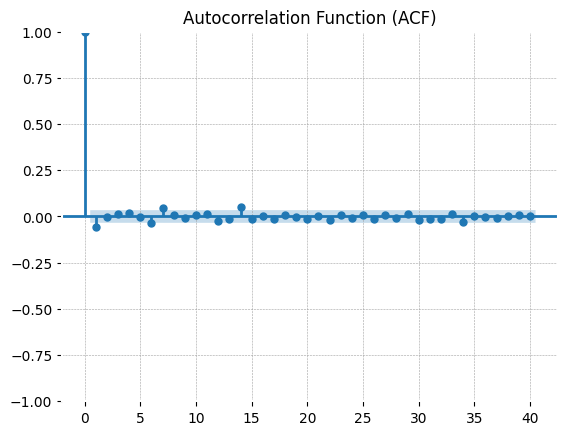

In [58]:
plt.figure(figsize=(10, 5))
plot_acf(tm_short_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
tm_short_data.reset_index(inplace=True)

In [60]:
# isolet the Date and Sales columns
tm_short_data = tm_short_data[['Datetime', 'Close_diff']]

In [61]:
tm_short_data

,Datetime,Close_diff
1970-01-01 00:00:00.000000005,2024-12-30 14:40:00+00:00,-0.040009
1970-01-01 00:00:00.000000006,2024-12-30 14:42:00+00:00,-0.334991
1970-01-01 00:00:00.000000007,2024-12-30 14:44:00+00:00,-0.085007
1970-01-01 00:00:00.000000008,2024-12-30 14:46:00+00:00,-0.009995
1970-01-01 00:00:00.000000009,2024-12-30 14:48:00+00:00,-0.070007
...,...,...
1970-01-01 00:00:00.000003295,2025-01-28 20:50:00+00:00,0.360001
1970-01-01 00:00:00.000003296,2025-01-28 20:52:00+00:00,-0.050003
1970-01-01 00:00:00.000003297,2025-01-28 20:54:00+00:00,0.029999
1970-01-01 00:00:00.000003298,2025-01-28 20:56:00+00:00,-0.110001


In [62]:
# Split into training and testing sets based on index
train_size = int(len(tm_short_data) * 0.8)  # 80% for training
train_data = tm_short_data[:train_size]
test_data = tm_short_data[train_size:]

In [63]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [64]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-30 14:40:00+0000', tz='UTC'),
 Timestamp('2025-01-22 20:46:00+0000', tz='UTC'))

In [65]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-22 20:48:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:58:00+0000', tz='UTC'))

## Normalize the data

In [66]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [67]:
# Create sequences for the LSTM model
sequence_length = 60
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [68]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [69]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1339
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.7661e-04
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.1533e-04
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.8268e-04
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.7718e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
23.62285852432251


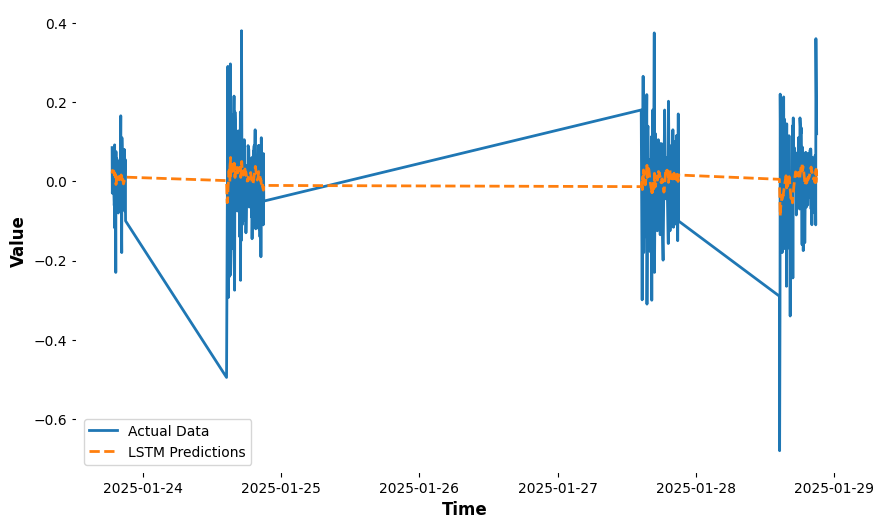

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [70]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

-5785.036420275801


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

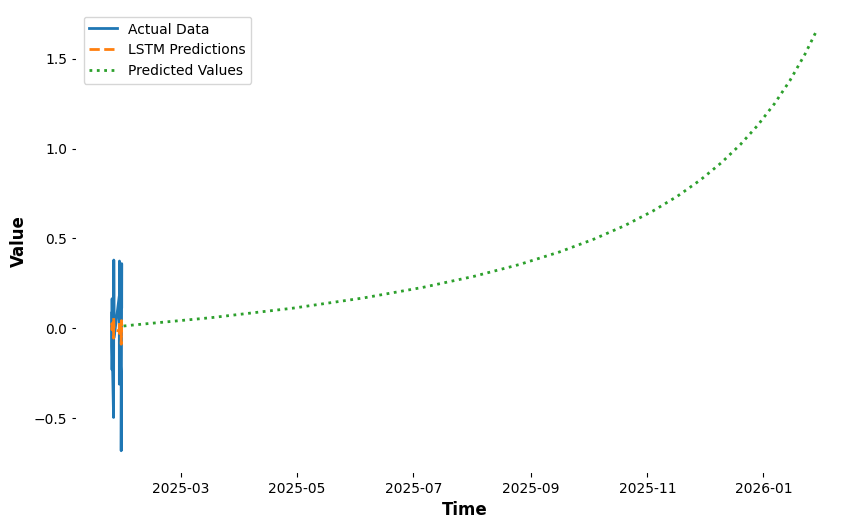

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()